In [1]:
import os
os.getcwd()  #  hangi working directorydeyim.

'D:\\__PyScripts\\data\\ML_ornek'

In [2]:
os.chdir('D:\\__PyScripts\\')

In [3]:
from data.YigasHelpers import *  #  kendi fonksiyonlarımı ve bazı kütüphaneleri importluyorum.

In [4]:
#  dataframe wide ve long olsa bile tüm gözlem birimlerini ve sütunları görmek için ayarlamalar.

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
titanic = pd.read_csv('data/ML_ornek/titanic.csv')

In [6]:
df = titanic.copy()

In [7]:
#  sibsp - Number of Siblings/Spouses Aboard
#  parch - Number of Parents/Children Aboard
#  embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C


In [8]:
df.columns = [col.upper() for col in df.columns]

In [9]:
df['SURVIVED'].value_counts() * 100 / len(df)

0   61.616
1   38.384
Name: SURVIVED, dtype: float64

In [10]:
train, test = train_test_split(df, test_size=.2, stratify=df['SURVIVED'], random_state=0)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 502 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  712 non-null    int64  
 1   SURVIVED     712 non-null    int64  
 2   PCLASS       712 non-null    int64  
 3   NAME         712 non-null    object 
 4   SEX          712 non-null    object 
 5   AGE          566 non-null    float64
 6   SIBSP        712 non-null    int64  
 7   PARCH        712 non-null    int64  
 8   TICKET       712 non-null    object 
 9   FARE         712 non-null    float64
 10  CABIN        160 non-null    object 
 11  EMBARKED     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [12]:
train.describe([.05, .25, .5, .75, .95, .99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
PASSENGERID,712.000,443.346,260.959,2.000,40.550,214.750,438.500,675.250,845.900,881.890,891.000
SURVIVED,712.000,0.383,0.487,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
PCLASS,712.000,2.303,0.836,1.000,1.000,2.000,3.000,3.000,3.000,3.000,3.000
AGE,566.000,29.470,14.399,0.420,4.000,20.000,28.000,38.000,55.750,65.350,80.000
SIBSP,712.000,0.515,1.059,0.000,0.000,0.000,0.000,1.000,3.000,4.890,8.000
PARCH,712.000,0.364,0.778,0.000,0.000,0.000,0.000,0.000,2.000,3.000,6.000
FARE,712.000,33.064,52.799,0.000,7.225,7.925,14.458,30.500,120.000,260.741,512.329


In [13]:
train.isnull().sum()

PASSENGERID      0
SURVIVED         0
PCLASS           0
NAME             0
SEX              0
AGE            146
SIBSP            0
PARCH            0
TICKET           0
FARE             0
CABIN          552
EMBARKED         2
dtype: int64

In [14]:
missing_values_table(train)

          n_miss  ratio
CABIN        552 77.530
AGE          146 20.510
EMBARKED       2  0.280


In [15]:
train.drop("CABIN", axis=1, inplace=True)
test.drop("CABIN", axis=1, inplace=True)

C:\Users\YIGITAS\AppData\Local\Temp\ipykernel_7500\3874760882.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(x=train["AGE"], kde=False, color="Red", hist_kws=dict(edgecolor="black", linewidth=2))


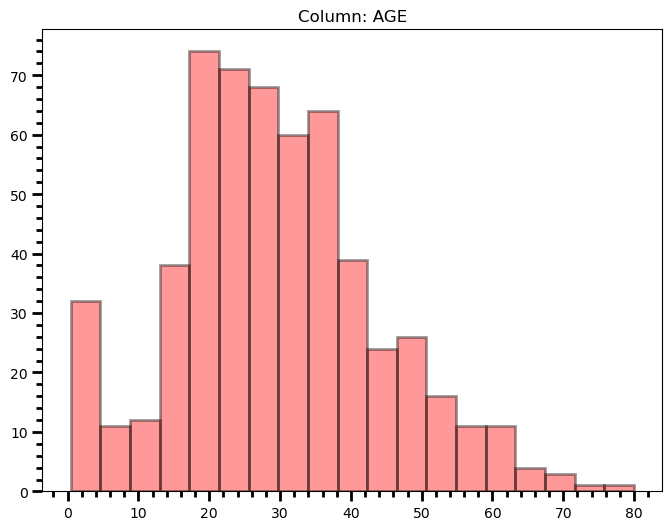

In [16]:
fig = plt.figure(figsize=(8,6))
g = sns.distplot(x=train["AGE"], kde=False, color="Red", hist_kws=dict(edgecolor="black", linewidth=2))
g.set_title("Column: AGE")
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)
plt.show()

C:\Users\YIGITAS\AppData\Local\Temp\ipykernel_7500\545123237.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(x=train["AGE"], color="Red", shade=True)


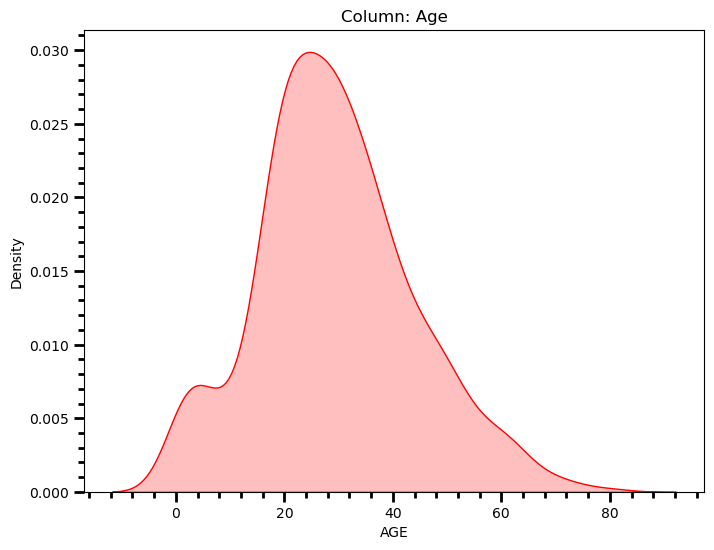

In [17]:
fig = plt.figure(figsize=(8,6))
g = sns.kdeplot(x=train["AGE"], color="Red", shade=True)
g.set_title("Column: Age")
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)
plt.show()

In [18]:
train.groupby('SURVIVED').agg({'AGE': 'mean'})

,AGE
SURVIVED,
0,30.194
1,28.420


C:\Users\YIGITAS\AppData\Local\Temp\ipykernel_7500\901423369.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(x=train["AGE"], hue=train["SURVIVED"], shade=True)


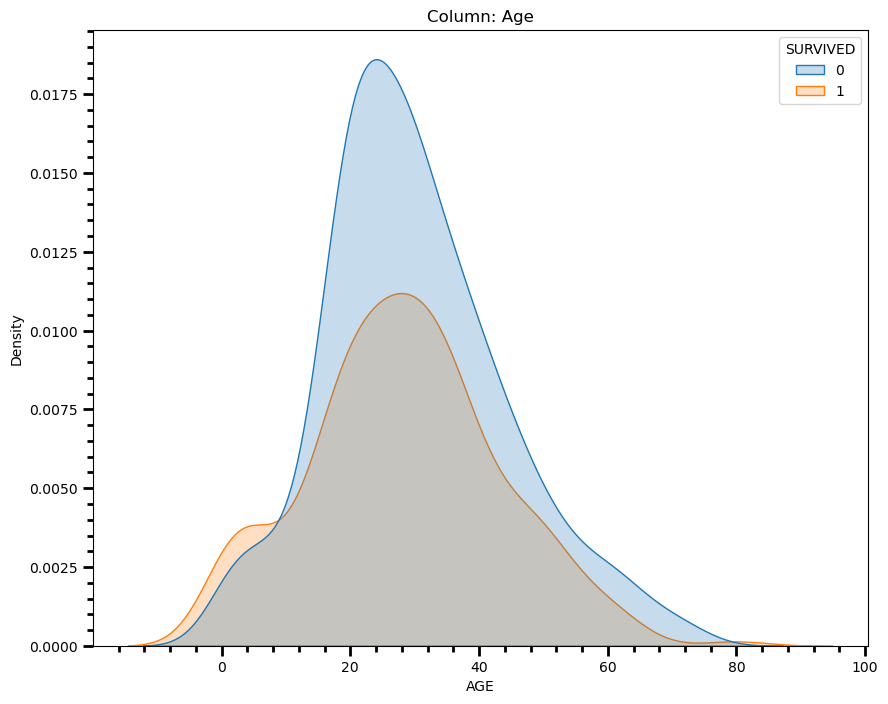

In [19]:
fig = plt.figure(figsize=(10,8))
g = sns.kdeplot(x=train["AGE"], hue=train["SURVIVED"], shade=True)
g.set_title("Column: Age")
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)
plt.show()

In [20]:
train["AGE"].fillna(train["AGE"].mean(), inplace=True)
test["AGE"].fillna(train["AGE"].mean(), inplace=True)  # testtekini de trainden elde ettiğim ortalama ile dolduruyorum

In [21]:
train.isnull().sum().sort_values(ascending=False)

EMBARKED       2
PASSENGERID    0
SURVIVED       0
PCLASS         0
NAME           0
SEX            0
AGE            0
SIBSP          0
PARCH          0
TICKET         0
FARE           0
dtype: int64

In [22]:
test.isnull().any()

PASSENGERID    False
SURVIVED       False
PCLASS         False
NAME           False
SEX            False
AGE            False
SIBSP          False
PARCH          False
TICKET         False
FARE           False
EMBARKED       False
dtype: bool

In [23]:
train.dropna(inplace=True)

In [24]:
train.isnull().any()

PASSENGERID    False
SURVIVED       False
PCLASS         False
NAME           False
SEX            False
AGE            False
SIBSP          False
PARCH          False
TICKET         False
FARE           False
EMBARKED       False
dtype: bool

In [25]:
cat_cols = [col for col in train.columns if str(train[col].dtypes) == "object"]
num_but_cat = [col for col in train.columns if train[col].nunique() < 5 and train[col].dtypes in ["int64", "int32", "float64", "float32"]]
cat_but_car = [col for col in train.columns if train[col].nunique() > 20 and str(train[col].dtypes) in ["category", "object"]]

In [26]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

num_cols = [col for col in train.columns if train[col].dtypes in ["int", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]

In [27]:
cat_cols.append('SIBSP')
cat_cols.append('PARCH')

In [28]:
for col in cat_cols:
    if col != 'SURVIVED':
        print(train.groupby(col).agg('SURVIVED').mean())

SEX
female   0.743
male     0.187
Name: SURVIVED, dtype: float64
EMBARKED
C   0.527
Q   0.377
S   0.346
Name: SURVIVED, dtype: float64
PCLASS
1   0.626
2   0.493
3   0.231
Name: SURVIVED, dtype: float64
SIBSP
0   0.339
1   0.551
2   0.450
3   0.250
4   0.133
5   0.000
8   0.000
Name: SURVIVED, dtype: float64
PARCH
0   0.344
1   0.526
2   0.508
3   0.667
4   0.000
5   0.333
6   0.000
Name: SURVIVED, dtype: float64


In [29]:
train.groupby(["EMBARKED", "PCLASS"]).agg({"SURVIVED": "mean"})

SURVIVED
EMBARKED PCLASS          
C        1          0.672
         2          0.500
         3          0.333
Q        1          0.000
         2          0.667
         3          0.368
S        1          0.602
         2          0.489
         3          0.187

In [30]:
for col in cat_cols:
    if col != 'SURVIVED':
        print('####')
        print(str(col))
        target_summary_with_cat(train, 'SURVIVED', col)

####
SEX
        TARGET_MEAN  Count  Ratio
female        0.743    249 35.070
male          0.187    461 64.930


####
EMBARKED
   TARGET_MEAN  Count  Ratio
C        0.527    131 18.451
Q        0.377     61  8.592
S        0.346    518 72.958


####
PCLASS
   TARGET_MEAN  Count  Ratio
1        0.626    171 24.085
2        0.493    150 21.127
3        0.231    389 54.789


####
SIBSP
   TARGET_MEAN  Count  Ratio
0        0.339    484 68.169
1        0.551    167 23.521
2        0.450     20  2.817
3        0.250     16  2.254
4        0.133     15  2.113
5        0.000      4  0.563
8        0.000      4  0.563


####
PARCH
   TARGET_MEAN  Count  Ratio
0        0.344    544 76.620
1        0.526     95 13.380
2        0.508     61  8.592
3        0.667      3  0.423
4        0.000      3  0.423
5        0.333      3  0.423
6        0.000      1  0.141




In [31]:
for col in num_cols:
    target_summary_with_num(train, 'SURVIVED', col)

            AGE
SURVIVED       
0        30.022
1        28.423


           FARE
SURVIVED       
0        21.833
1        50.911




In [32]:
rare_analyser(train, 'SURVIVED', cat_cols)

SEX : 2
        COUNT  RATIO  TARGET_MEAN
female    249  0.351        0.743
male      461  0.649        0.187


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    131  0.185        0.527
Q     61  0.086        0.377
S    518  0.730        0.346


SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    439  0.618        0.000
1    271  0.382        1.000


PCLASS : 3
   COUNT  RATIO  TARGET_MEAN
1    171  0.241        0.626
2    150  0.211        0.493
3    389  0.548        0.231


SIBSP : 7
   COUNT  RATIO  TARGET_MEAN
0    484  0.682        0.339
1    167  0.235        0.551
2     20  0.028        0.450
3     16  0.023        0.250
4     15  0.021        0.133
5      4  0.006        0.000
8      4  0.006        0.000


PARCH : 7
   COUNT  RATIO  TARGET_MEAN
0    544  0.766        0.344
1     95  0.134        0.526
2     61  0.086        0.508
3      3  0.004        0.667
4      3  0.004        0.000
5      3  0.004        0.333
6      1  0.001        0.000




In [33]:
train['PARCH'].dtypes

dtype('int64')

In [34]:
train['PARCH'] = train['PARCH'].astype(object)

In [35]:
train.SIBSP.dtypes

dtype('int64')

In [36]:
train['SIBSP'] = train['SIBSP'].astype(object)

In [37]:
train = rare_encoder(train, .05)

In [38]:
test['PARCH'] = test['PARCH'].astype(object)
test['SIBSP'] = test['SIBSP'].astype(object)

In [39]:
test = rare_encoder(test, .05)

In [40]:
rare_analyser(train, 'SURVIVED', cat_cols)

SEX : 2
        COUNT  RATIO  TARGET_MEAN
female    249  0.351        0.743
male      461  0.649        0.187


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    131  0.185        0.527
Q     61  0.086        0.377
S    518  0.730        0.346


SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    439  0.618        0.000
1    271  0.382        1.000


PCLASS : 3
   COUNT  RATIO  TARGET_MEAN
1    171  0.241        0.626
2    150  0.211        0.493
3    389  0.548        0.231


SIBSP : 3
      COUNT  RATIO  TARGET_MEAN
0       484  0.682        0.339
1       167  0.235        0.551
Rare     59  0.083        0.254


PARCH : 4
      COUNT  RATIO  TARGET_MEAN
0       544  0.766        0.344
1        95  0.134        0.526
2        61  0.086        0.508
Rare     10  0.014        0.300




In [41]:
rare_analyser(test, 'SURVIVED', cat_cols)

SEX : 2
        COUNT  RATIO  TARGET_MEAN
female     63  0.352        0.730
male      116  0.648        0.198


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C     37  0.207        0.649
Q     16  0.089        0.438
S    126  0.704        0.302


SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    110  0.615        0.000
1     69  0.385        1.000


PCLASS : 3
   COUNT  RATIO  TARGET_MEAN
1     43  0.240        0.628
2     34  0.190        0.382
3    102  0.570        0.284


SIBSP : 3
      COUNT  RATIO  TARGET_MEAN
0       122  0.682        0.361
1        42  0.235        0.476
Rare     15  0.084        0.333


PARCH : 4
      COUNT  RATIO  TARGET_MEAN
0       132  0.737        0.333
1        23  0.128        0.652
2        19  0.106        0.474
Rare      5  0.028        0.200




In [42]:
cat_colmns = [col for col in cat_cols if col != 'SURVIVED']

In [43]:
train = one_hot_encoder(train, cat_colmns, drop_first=False)
test = one_hot_encoder(test, cat_colmns, drop_first=False)

In [44]:
train.shape[1] == test.shape[1]

True

In [45]:
mms = MinMaxScaler()

In [46]:
mms.fit(train[['FARE']])
scaled = mms.transform(train[['FARE']])
train['FARE'] = scaled

In [47]:
scaled = mms.transform(test[['FARE']])  # test setinde fitlemiyorum, traindeki fiti kullanıyorum.
test['FARE'] = scaled

In [48]:
mms.fit(train[['AGE']])
scaled = mms.transform(train[['AGE']])
train['AGE'] = scaled

In [49]:
scaled = mms.transform(test[['AGE']])
test['AGE'] = scaled

In [50]:
train.head(2)

,PASSENGERID,SURVIVED,NAME,AGE,TICKET,FARE,SEX_female,SEX_male,EMBARKED_C,EMBARKED_Q,EMBARKED_S,PCLASS_1,PCLASS_2,PCLASS_3,SIBSP_0,SIBSP_1,SIBSP_Rare,PARCH_0,PARCH_1,PARCH_2,PARCH_Rare
502,503,0,Rare,0.365,Rare,0.015,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
464,465,0,Rare,0.365,Rare,0.016,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0


In [51]:
X_train = train.drop(['PASSENGERID', 'NAME', 'TICKET', 'SURVIVED'], axis=1)
X_test = test.drop(['PASSENGERID', 'NAME', 'TICKET', 'SURVIVED'], axis=1)

In [52]:
y_train = train['SURVIVED']
y_test = test['SURVIVED']

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [54]:
cft = DecisionTreeClassifier(random_state=42)

In [55]:
cv_results = cross_validate(cft,
                            X_train, y_train,
                            cv=5,
                            scoring=['f1', 'precision', 'recall', 'accuracy'])

In [56]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_f1'].mean())

0.7915492957746479
0.7279619272237197
0.7303030303030302
0.7277600793928446


In [57]:
cft.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [58]:
#  çok uzun sürmesin diye abartmıyorum hiperparametre gridini

cft_params = {'max_depth': [i for i in range(3, 11)],
               'min_samples_split': [i for i in range(6, 25)]}

In [59]:
cft_grid_search = GridSearchCV(cft,
                             cft_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=1)

In [60]:
cft_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14,
                                               15, 16, 17, 18, 19, 20, 21, 22,
                                               23, 24]},
             verbose=1)

In [61]:
cft_grid_search.best_params_

{'max_depth': 3, 'min_samples_split': 6}

In [62]:
cft_fin = DecisionTreeClassifier(**cft_grid_search.best_params_, random_state=42).fit(X_train, y_train)

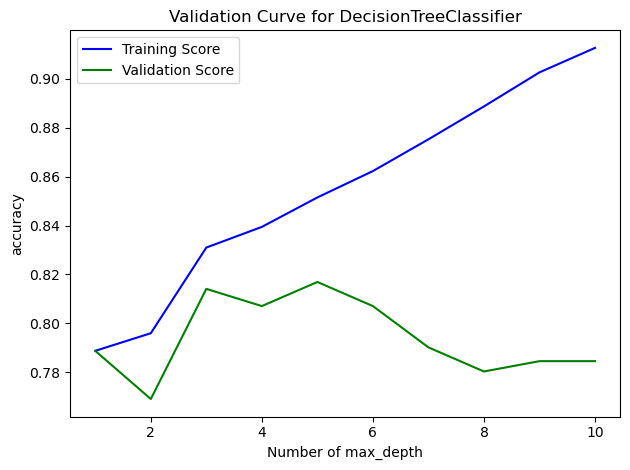

In [63]:
#  Örnek olması adına böyle bir şey yaptım. Train setinde monotonic bir trend görürken test setinde öyle değil.

val_curve_params(cft_fin, X_train, y_train, 'max_depth', range(1,11), scoring='accuracy')

In [64]:
y_pred = cft_fin.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 3)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 3)}")
print(f"F1: {round(f1_score(y_pred,y_test), 3)}")

Accuracy: 0.81
Recall: 0.797
Precision: 0.681
F1: 0.734


<Figure size 800x800 with 0 Axes>

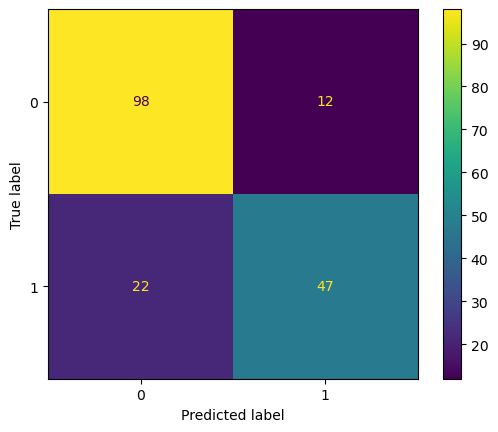

In [65]:
fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred, labels=cft_fin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cft_fin.classes_)
disp.plot()
plt.show()

In [66]:
import pydotplus

def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [67]:
tree_graph(model=cft_fin, col_names=X_train.columns, file_name='cft_fin_titanic.png')

In [68]:
tree_rules = export_text(cft_fin, feature_names=list(X_train.columns))
print(tree_rules)

|--- SEX_male <= 0.50
|   |--- PCLASS_3 <= 0.50
|   |   |--- AGE <= 0.03
|   |   |   |--- class: 0
|   |   |--- AGE >  0.03
|   |   |   |--- class: 1
|   |--- PCLASS_3 >  0.50
|   |   |--- FARE <= 0.05
|   |   |   |--- class: 1
|   |   |--- FARE >  0.05
|   |   |   |--- class: 0
|--- SEX_male >  0.50
|   |--- FARE <= 0.05
|   |   |--- AGE <= 0.16
|   |   |   |--- class: 1
|   |   |--- AGE >  0.16
|   |   |   |--- class: 0
|   |--- FARE >  0.05
|   |   |--- SIBSP_Rare <= 0.50
|   |   |   |--- class: 0
|   |   |--- SIBSP_Rare >  0.50
|   |   |   |--- class: 0



In [69]:
from sklearn.inspection import permutation_importance
#  bunu eli5 kütüphanesi ile yapmak da mümkün ama o sadece jupyter'da çalışıyor çünkü çıktı HTML olarak geliyor.
#  PyCharm falan kullanınca HTML renderlanamadığından çıktı görünemiyor o yüzden sklearn kullanacağım.

In [70]:
r = permutation_importance(cft_fin, X_train, y_train,
                           n_repeats=50,
                           random_state=42)

In [71]:
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f" {X_train.columns[i]:<8}"
               f" {r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

 SEX_male 0.264 +/- 0.017
 PCLASS_3 0.082 +/- 0.007
 AGE      0.046 +/- 0.006
 FARE     0.028 +/- 0.010


In [72]:
r = permutation_importance(cft_fin, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

In [73]:
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f" {X_train.columns[i]:<8}"
               f" {r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

 SEX_male 0.234 +/- 0.035
 PCLASS_3 0.085 +/- 0.017
 AGE      0.040 +/- 0.015


In [74]:
r_multi = permutation_importance(cft_fin, X_test, y_test,
                                 n_repeats=30,
                                 random_state=0,
                                 scoring=['accuracy', 'precision', 'recall', 'f1'])

In [75]:
for metric in r_multi:
     print(f"{metric}")
     r = r_multi[metric]
     for i in r.importances_mean.argsort()[::-1]:
         if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
             print(f"    {X_train.columns[i]:<8}"
                   f" {r.importances_mean[i]:.3f}"
                   f" +/- {r.importances_std[i]:.3f}")

accuracy
    SEX_male 0.234 +/- 0.035
    PCLASS_3 0.085 +/- 0.017
    AGE      0.040 +/- 0.015
precision
    SEX_male 0.351 +/- 0.049
    PCLASS_3 0.087 +/- 0.026
    AGE      0.077 +/- 0.024
recall
    SEX_male 0.272 +/- 0.045
    PCLASS_3 0.199 +/- 0.036
    FARE     0.074 +/- 0.026
f1
    SEX_male 0.308 +/- 0.047
    PCLASS_3 0.161 +/- 0.032
    FARE     0.051 +/- 0.023
    AGE      0.046 +/- 0.020


In [76]:
from pdpbox import pdp  # partial dependence plots

In [77]:
feature_names = X_test.columns.tolist()

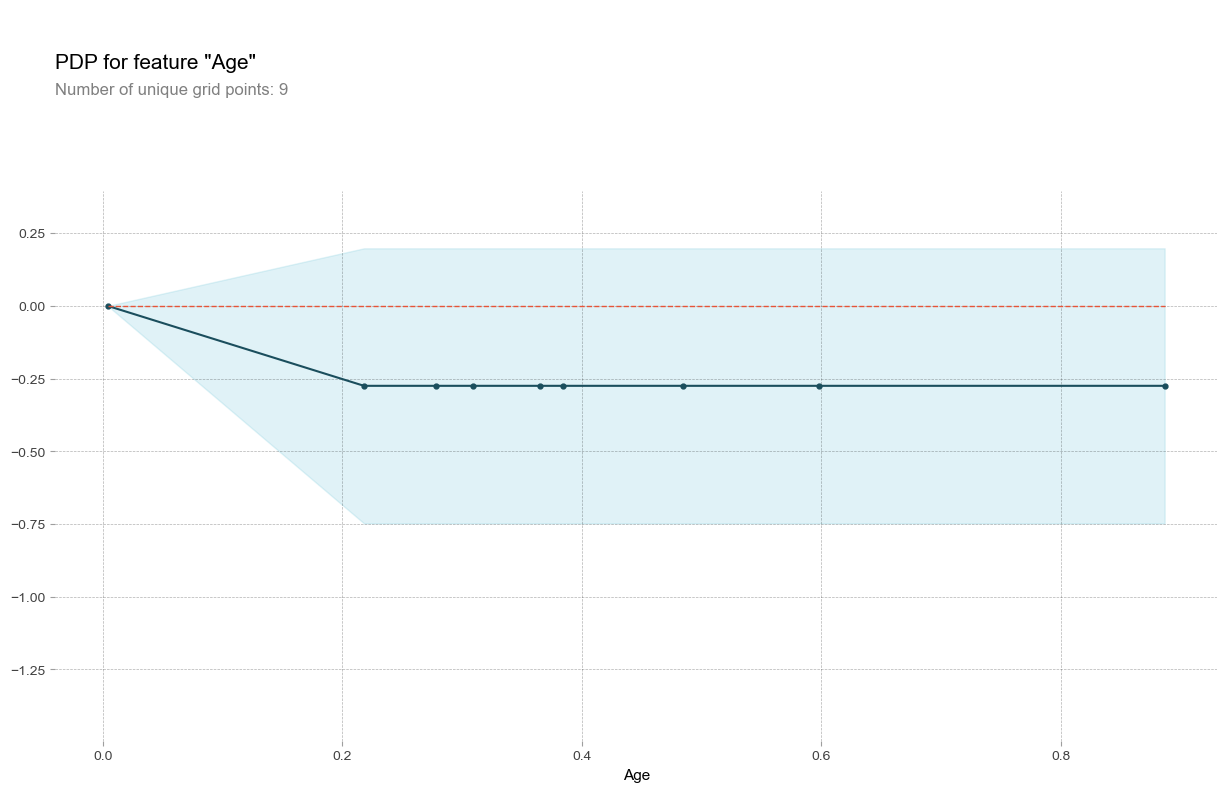

In [78]:
pdp_age = pdp.pdp_isolate(model=cft_fin, dataset=X_test, model_features=feature_names, feature="AGE")

pdp.pdp_plot(pdp_age, "Age")
plt.show()

In [79]:
#  interaction

features_to_plot = ["AGE", "FARE"]
inter1 = pdp.pdp_interact(model=cft_fin, dataset=X_test, model_features=feature_names, features=features_to_plot)

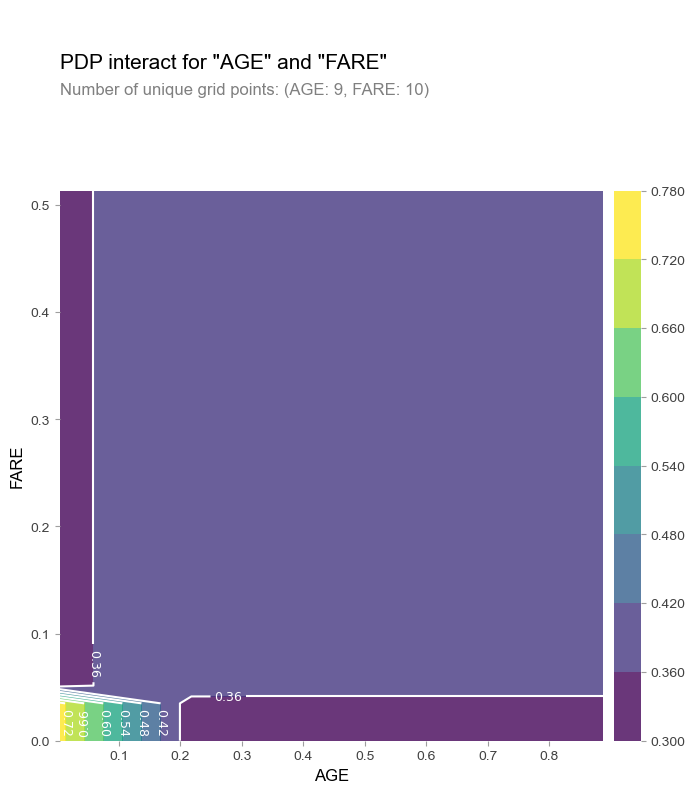

In [80]:
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [81]:
import shap

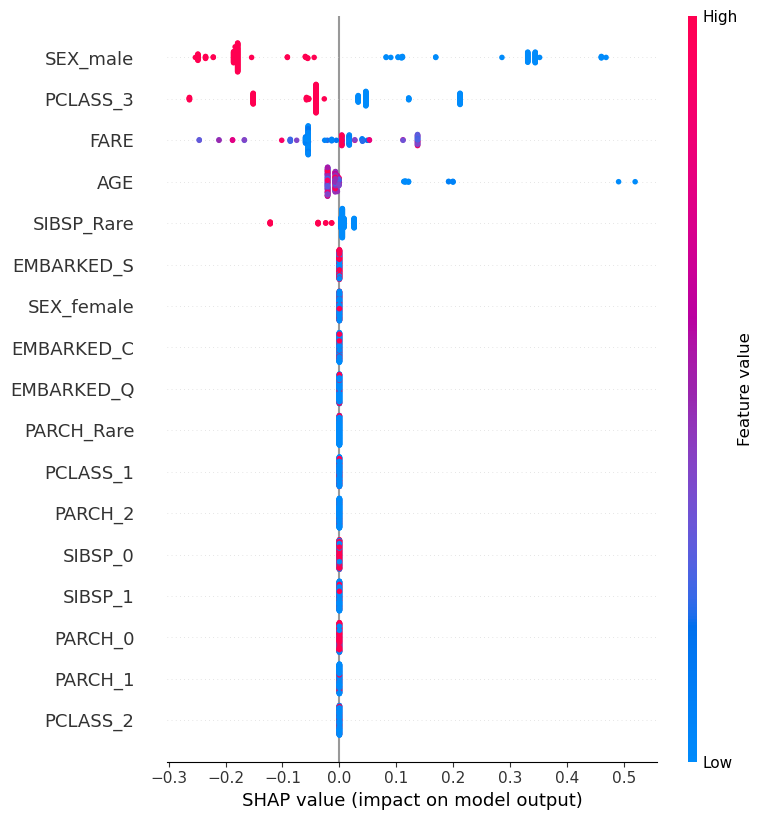

In [82]:
#  Mesela drop_first yapmadığım için one hot encodingte hem SEX_male hem SEX_female var.
#  SEX_female hiçbir bilgi vermiyor gibi gözüküyor ama aslında o bilgi SEX_male'den geliyor diye öyle :)

explainer = shap.TreeExplainer(cft_fin)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

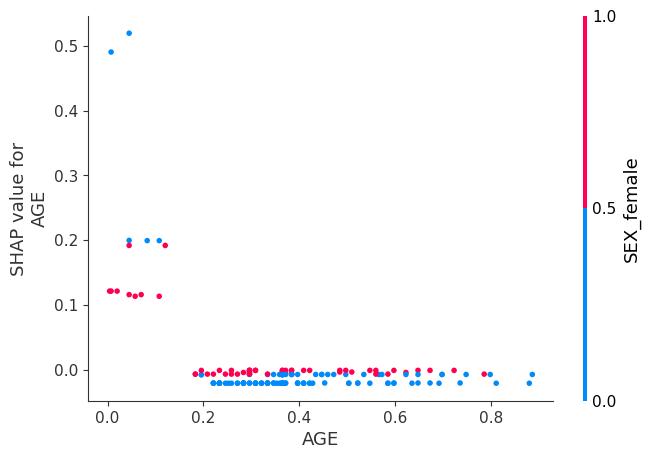

In [83]:
explainer = shap.TreeExplainer(cft_fin)
shap_values = explainer.shap_values(X_test)
shap.dependence_plot("AGE", shap_values[1], X_test)

#  Her bir nokta verimizdeki bir satıra tekabul ediyor.
#  Yatay pozisyon = verideki gerçek değer.
#  Dikey pozisyon = o değere sahip olmak tahminimizi nasıl etkiledi.

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(random_state=42)

In [86]:
#  çok uzun sürmesin diye abartmıyorum hiperparametre gridini

rf_params = {"max_depth": [5, 7, 10, 12, None],
             "max_features": [5, 7, 10, "sqrt", "auto"],
             "min_samples_split": [6, 8, 15, 20, 25],
             "n_estimators": [300, 500, 800]}

In [87]:
rf_grid_search = GridSearchCV(
    rf,
    rf_params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [88]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 12, None],
                         'max_features': [5, 7, 10, 'sqrt', 'auto'],
                         'min_samples_split': [6, 8, 15, 20, 25],
                         'n_estimators': [300, 500, 800]},
             verbose=1)

In [89]:
rf_grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 8,
 'n_estimators': 300}

In [90]:
rf_fin = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42).fit(X_train, y_train)

In [91]:
y_pred = rf_fin.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 3)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 3)}")
print(f"F1: {round(f1_score(y_pred,y_test), 3)}")

Accuracy: 0.827
Recall: 0.839
Precision: 0.681
F1: 0.752


<Figure size 800x800 with 0 Axes>

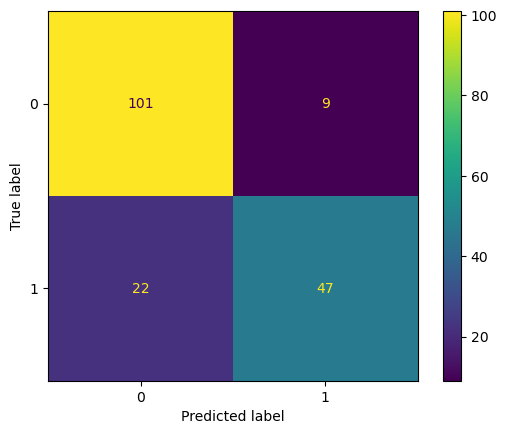

In [92]:
fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred, labels=rf_fin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_fin.classes_)
disp.plot()
plt.show()